# TP n°1 : Introduction au traitement du signal, aux signaux sonores et aux images


In [1]:
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt

## I. Manipulation de fichiers numériques

### 1.Signal audio

In [2]:
fs, signal = wav.read('diner.wav')

In [3]:
print(f'Frequence : {fs/1000} kHz')

Frequence : 16.0 kHz


In [4]:
signal= np.array(signal,dtype=np.float16)
signal=signal/2**15

In [5]:
length = signal.shape[0] / fs
print(f"length = {length}s")

length = 10.9453125s


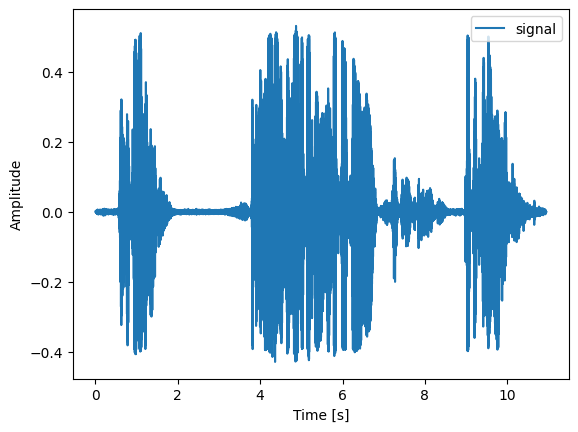

In [6]:
time = np.linspace(0., length, signal.shape[0])
plt.plot(time, signal, label="signal")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [7]:
print([ s for s in signal if s!=0][:10])

[-3.0517578e-05, 3.0517578e-05, -3.0517578e-05, 3.0517578e-05, -3.0517578e-05, -3.0517578e-05, 3.0517578e-05, -3.0517578e-05, 3.0517578e-05, 3.0517578e-05]


### 2.Image

In [8]:
img = plt.imread('photo.jpg')
h,w,rvb=img.shape
print(f'Hauteur : {h} , Largeur : {w} et rvb {3}')

Hauteur : 595 , Largeur : 900 et rvb 3


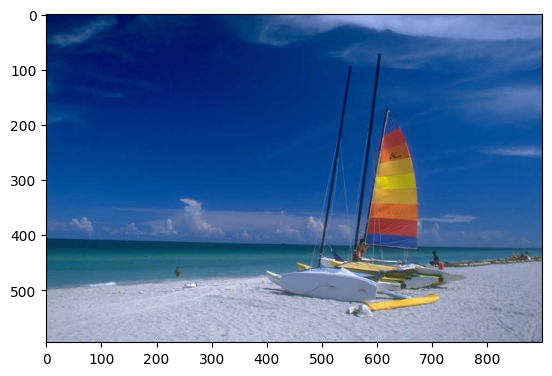

In [9]:
plt.imshow(img)
print()

In [10]:
def intensite(img,pixel):
    x,y=pixel
    return img[x,y,:]/np.sum(img[x,y,:])*100
pixel=(0,0)
print(f'Intensité des couleurs du pixel {pixel} est {intensite(img,pixel)}')

Intensité des couleurs du pixel (0, 0) est [ 1.83486239 14.67889908 83.48623853]


## II. Quantification, échantillonnage

Ecrivez une fonction qui permette de sous-quantifier un fichier audio. Testez-la avec une quantification de 12, 8, 4 et 2 bits. Que pensez-vous de la qualité du son résultant ?
Remarque : utilisez wav.write pour enregistrer le résultat dans un fichier afin de l'écouter.

In [11]:
def quantif(q):
    fs, signal = wav.read('diner.wav')
    signal= np.array(signal,dtype=np.float16)
    signal=signal/2**15
    data=np.round(signal*(2**(q-1)))*(2**(16-q))
    data=data.astype(np.int16)
    wav.write(f"dinerQ{q}.wav", fs, data)
    
def echantil(q):
    fs, signal = wav.read('diner.wav')
    data=signal[::q]
    fs2=(int(fs/q))
    wav.write(f"dinerE{q}.wav", fs2, data)
echantil(32) 
for q in [ 8,4,2]:
    quantif(q)
    echantil(q)

In [18]:
def show_quantif():
    fig, axs = plt.subplots(1,4,figsize=(15,4))
    for a,i in enumerate([12,8,4,2]):
        fs, signal = wav.read(f'dinerQ{i}.wav')
        signal=signal/2**(16-1)
        length= signal.shape[0] / fs
        time = np.linspace(0., length, signal.shape[0])
        axs[a].plot(time, signal, label=f'signal Q{i}')
        axs[a].legend()
        axs[a].set_xlabel("Time [s]")
        axs[a].set_ylabel("Amplitude")
    plt.show()

def show_echan():
    fig, axs = plt.subplots(1,3,figsize=(12,4))
    for a,i in enumerate([32,4,2]):
        fs, signal = wav.read(f'dinerE{i}.wav')
        signal=signal/2**15
        length= signal.shape[0] / fs
        time = np.linspace(0., length, signal.shape[0])
        axs[a].plot(time, signal, label=f'signal E{i}')
        axs[a].legend()
        axs[a].set_xlabel("Time [s]")
        axs[a].set_ylabel("Amplitude")
    plt.show()

### Sous quantification

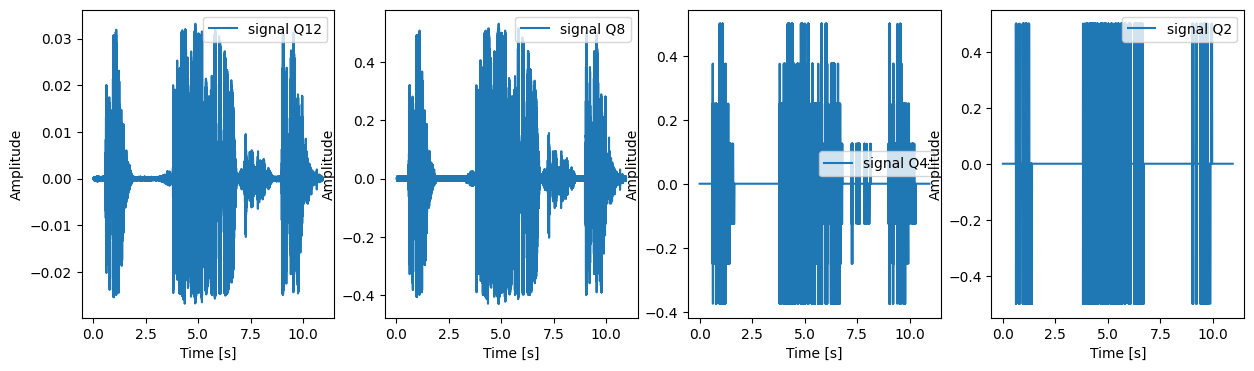

In [19]:
show_quantif()

### Sous echantillonage

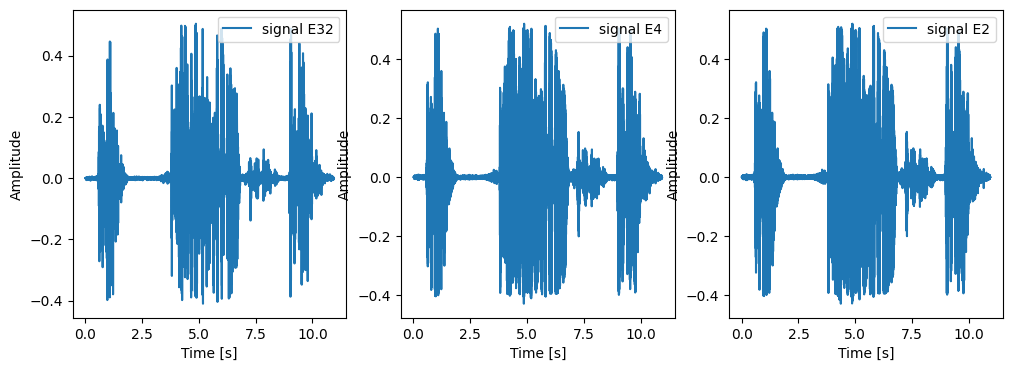

In [20]:
show_echan()

### Sous quantification d'une image

[128, 64, 32, 16, 8, 4, 2]



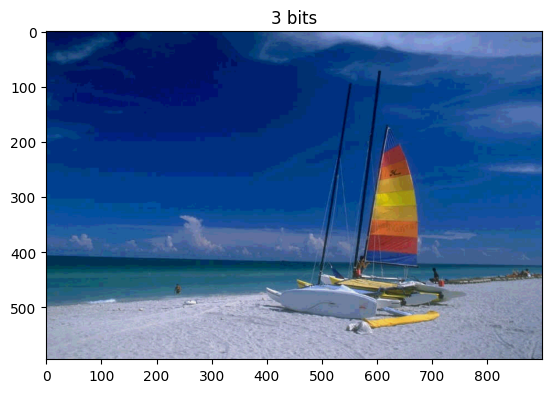

In [21]:
def sous_quantif_im(img,n):
    img_r=np.copy(img).astype(np.uint8)
    poids=[2**b for b in range(7,0,-1)]
    print(poids)
    le_poid=np.sum(poids[:n+1])
    return np.bitwise_and(img_r,le_poid)    
img1=sous_quantif_im(img,3)   
plt.title("3 bits")
plt.imshow(img1)
print()
        

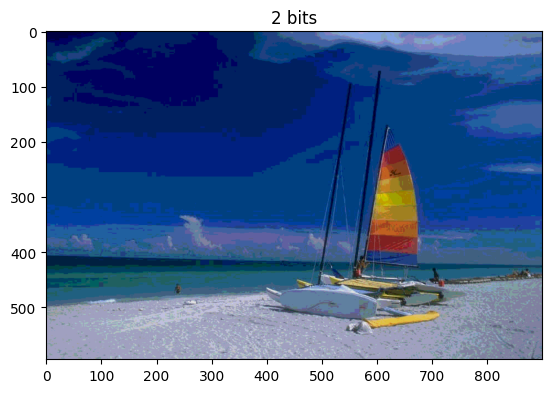

In [16]:
img2=sous_quantif_im(img,2)
plt.title("2 bits")
plt.imshow(img2)
print()

[128, 64, 32, 16, 8, 4, 2]
192



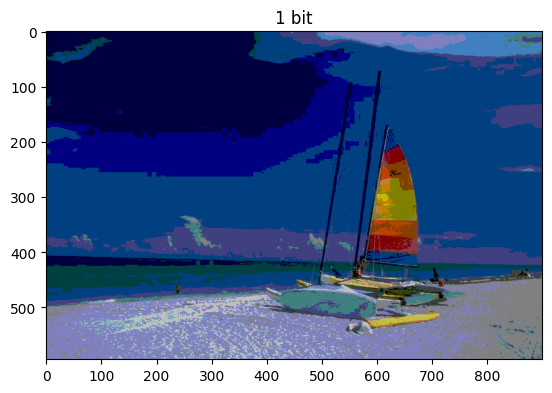

In [22]:
img3=sous_quantif_im(img,1)
plt.title("1 bit")
plt.imshow(img3)
print(img3.max())
print()

On remarque que des zones sont beaucoups plus uniformes qu'avant